### This notebook is based on the linear regression tutorial code from the blog post  [PyTorch (3) Linear Regression](http://aidiary.hatenablog.com/entry/20180131/1517387821)

In the tutorial scikit-learn the [Boston house price dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#examples-using-sklearn-datasets-load-boston) is used.

You can also check out the [tutorial](https://machine-learning-python.kspax.io/application/linear_regression) using the sklearn library





epoch 0, loss: 583.9393 val_loss: 598.2154
epoch 200, loss: 449.9127 val_loss: 475.2734
epoch 400, loss: 368.9606 val_loss: 397.2615
epoch 600, loss: 303.9657 val_loss: 332.6836
epoch 800, loss: 249.1576 val_loss: 276.6391
epoch 1000, loss: 202.6560 val_loss: 228.4083
epoch 1200, loss: 163.5032 val_loss: 187.5325
epoch 1400, loss: 130.9072 val_loss: 153.2969
epoch 1600, loss: 104.1304 val_loss: 124.9490
epoch 1800, loss: 82.4743 val_loss: 101.7837
epoch 2000, loss: 65.2746 val_loss: 83.1443
epoch 2200, loss: 51.9002 val_loss: 68.4139
epoch 2400, loss: 41.7531 val_loss: 57.0098
epoch 2600, loss: 34.2718 val_loss: 48.3839
epoch 2800, loss: 28.9363 val_loss: 42.0266
epoch 3000, loss: 25.2744 val_loss: 37.4716
epoch 3200, loss: 22.8699 val_loss: 34.3045
epoch 3400, loss: 21.3689 val_loss: 32.1692
epoch 3600, loss: 20.4844 val_loss: 30.7721
epoch 3800, loss: 19.9961 val_loss: 29.8829
epoch 4000, loss: 19.7457 val_loss: 29.3305
epoch 4200, loss: 19.6274 val_loss: 28.9937
epoch 4400, loss: 19

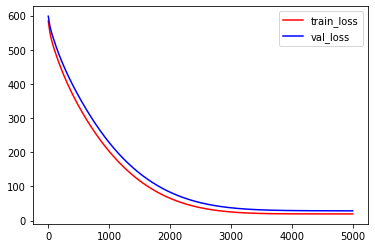

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# hyper parameters
input_size = 13
output_size = 1
num_epochs = 5000
learning_rate = 0.01

boston = load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

# データの標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

# linear regression model
class LinearRegression(nn.Module):

    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(input_size, output_size)

# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

def train(X_train, y_train):
    inputs = torch.from_numpy(X_train).float()
    targets = torch.from_numpy(y_train).float()

    optimizer.zero_grad()
    outputs = model(inputs)

    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    return loss.item()

def valid(X_test, y_test):
    inputs = torch.from_numpy(X_test).float()
    targets = torch.from_numpy(y_test).float()
    
    outputs = model(inputs)
    val_loss = criterion(outputs, targets)
    
    return val_loss.item()
        
# train the model
loss_list = []
val_loss_list = []
for epoch in range(num_epochs):
    # data shuffle
    perm = np.arange(X_train.shape[0])
    np.random.shuffle(perm)
    X_train = X_train[perm]
    y_train = y_train[perm]

    loss = train(X_train, y_train)
    val_loss = valid(X_test, y_test)

    if epoch % 200 == 0:
        print('epoch %d, loss: %.4f val_loss: %.4f' % (epoch, loss, val_loss))

    loss_list.append(loss)
    val_loss_list.append(val_loss)

# plot learning curve
plt.plot(range(num_epochs), loss_list, 'r-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, 'b-', label='val_loss')
plt.legend()